In [1]:
pip install pandas-datareader


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as data
import matplotlib.pyplot as plt
import yfinance as yf

In [77]:
start = '1999-01-01'
end='2022-05-07'
df =data.DataReader('AAPL', 'yahoo',start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1998-12-31,0.369420,0.352679,0.361607,0.365513,2.716896e+08,0.313378
1999-01-04,0.377232,0.357143,0.376116,0.368304,9.528848e+08,0.315771
1999-01-05,0.392299,0.370536,0.374442,0.386719,1.410114e+09,0.331559
1999-01-06,0.393973,0.366071,0.393973,0.372768,1.348570e+09,0.319598
1999-01-07,0.402344,0.376116,0.377232,0.401786,1.429019e+09,0.344477


In [78]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-10,172.500000,168.169998,169.080002,172.190002,106765600.0,172.190002
2022-01-11,175.179993,170.820007,172.320007,175.080002,76138300.0,175.080002
2022-01-12,177.179993,174.820007,176.119995,175.529999,74805200.0,175.529999
2022-01-13,176.619995,171.789993,175.779999,172.190002,84505800.0,172.190002
2022-01-14,173.779999,171.089996,171.339996,173.070007,80355000.0,173.070007


In [79]:
df=df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,1998-12-31,0.369420,0.352679,0.361607,0.365513,2.716896e+08,0.313378
1,1999-01-04,0.377232,0.357143,0.376116,0.368304,9.528848e+08,0.315771
2,1999-01-05,0.392299,0.370536,0.374442,0.386719,1.410114e+09,0.331559
3,1999-01-06,0.393973,0.366071,0.393973,0.372768,1.348570e+09,0.319598
4,1999-01-07,0.402344,0.376116,0.377232,0.401786,1.429019e+09,0.344477


In [80]:
df = df.drop(['Date','Adj Close'],axis=1)
df.head()

,High,Low,Open,Close,Volume
0,0.369420,0.352679,0.361607,0.365513,2.716896e+08
1,0.377232,0.357143,0.376116,0.368304,9.528848e+08
2,0.392299,0.370536,0.374442,0.386719,1.410114e+09
3,0.393973,0.366071,0.393973,0.372768,1.348570e+09
4,0.402344,0.376116,0.377232,0.401786,1.429019e+09


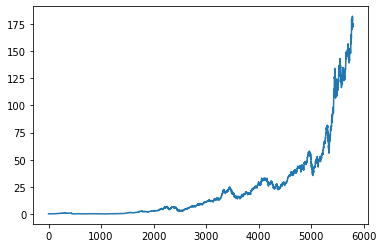

In [81]:
plt.plot(df.Close)

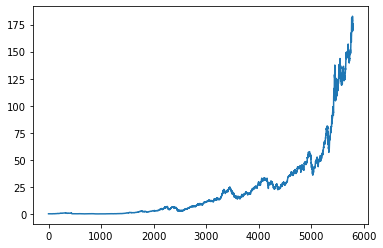

In [82]:
plt.plot(df.Open)

In [83]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
5794    156.2546
5795    156.5384
5796    156.8118
5797    157.0366
5798    157.2711
Name: Close, Length: 5799, dtype: float64

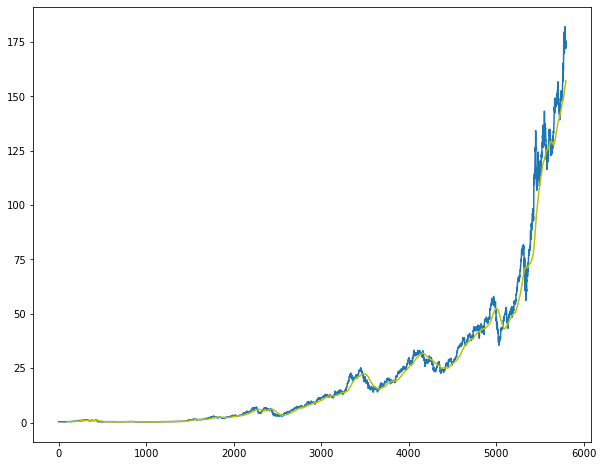

In [84]:
plt.figure(figsize =(10,8))
plt.plot(df.Close)
plt.plot(ma100,'y')

In [85]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
5794    145.57955
5795    145.84800
5796    146.12615
5797    146.37635
5798    146.62670
Name: Close, Length: 5799, dtype: float64

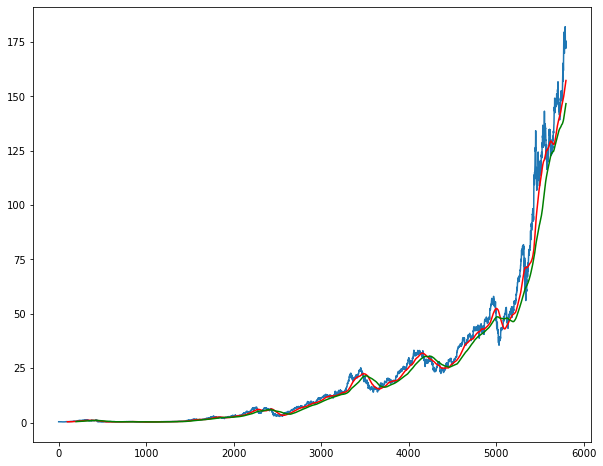

In [86]:
plt.figure(figsize =(10,8))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [87]:
df.shape

(5799, 5)

In [88]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.80)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.20):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(4639, 1)
(4640, 1)


In [89]:
data_training.head()

,Close
0,0.365513
1,0.368304
2,0.386719
3,0.372768
4,0.401786


In [90]:
data_testing.head()

,Close
1159,0.360357
1160,0.356607
1161,0.351964
1162,0.363214
1163,0.362857


In [91]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [92]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.00338295],
       [0.0034549 ],
       [0.00392963],
       ...,
       [0.98936595],
       [0.9952952 ],
       [0.99284622]])

In [93]:
data_training_array.shape

(4639, 1)

In [94]:
x_train =[]
y_train=[]

for i in range(100,data_training_array.shape[0] ):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])
    
x_train,y_train =np.array(x_train),np.array(y_train)
    


In [95]:
x_train.shape

(4539, 100, 1)

In [96]:
import keras
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential  

In [97]:
model = Sequential()
model.add(LSTM(units = 50, activation ='relu',return_sequences= True,
              input_shape =(x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation ='relu',return_sequences= True))
model.add(Dropout (0.3))


model.add(LSTM(units = 80, activation ='relu',return_sequences= True))
model.add(Dropout (0.4))

model.add(LSTM(units = 120, activation ='relu'))
model.add(Dropout (0.5))

model.add(Dense(units = 1))


In [98]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [99]:
model.compile(optimizer='adam',loss ='mean_squared_error')
model.fit(x_train, y_train, epochs =50)

Epoch 1/50
142/142 [==============================] - 19s 116ms/step - loss: 0.0165
Epoch 2/50
142/142 [==============================] - 17s 120ms/step - loss: 0.0040
Epoch 3/50
142/142 [==============================] - 18s 129ms/step - loss: 0.0036
Epoch 4/50
142/142 [==============================] - 18s 126ms/step - loss: 0.0034
Epoch 5/50
142/142 [==============================] - 18s 127ms/step - loss: 0.0032
Epoch 6/50
142/142 [==============================] - 18s 124ms/step - loss: 0.0033
Epoch 7/50
142/142 [==============================] - 18s 126ms/step - loss: 0.0025
Epoch 8/50
142/142 [==============================] - 18s 127ms/step - loss: 0.0026
Epoch 9/50
142/142 [==============================] - 20s 143ms/step - loss: 0.0024
Epoch 10/50
142/142 [==============================] - 19s 133ms/step - loss: 0.0022
Epoch 11/50
142/142 [==============================] - 19s 132ms/step - loss: 0.0025
Epoch 12/50
142/142 [==============================] - 19s 135ms/step - lo

In [100]:
model.save('keras_model.h5')

In [101]:
data_testing.tail()

,Close
5794,172.190002
5795,175.080002
5796,175.529999
5797,172.190002
5798,173.070007


In [27]:
past_100_days =data_training

In [28]:
final_df = past_100_days.append(data_testing,ignore_index=True)

In [29]:
final_df.head()

,Close
0,0.365513
1,0.368304
2,0.386719
3,0.372768
4,0.401786


In [30]:
input_data = scaler.fit_transform(final_df)

In [31]:
input_data

array([[7.21917151e-04],
       [7.37271333e-04],
       [8.38577356e-04],
       ...,
       [9.64351696e-01],
       [9.45977424e-01],
       [9.50818582e-01]])

In [32]:
input_data.shape

(9279, 1)

In [33]:
x_test =[]
y_test=[]
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [34]:
x_test, y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(9179, 100, 1)
(9179,)


In [43]:
y_predicted = model.predict(x_test)

In [44]:
y_predicted.shape

(9179, 1)

In [45]:
y_test

array([1.57658403e-01, 1.52682825e-01, 1.57658403e-01, ...,
       1.73675701e+02, 1.70366571e+02, 1.71238444e+02])

In [46]:
y_predicted

array([[0.01627344],
       [0.01627794],
       [0.01628157],
       ...,
       [0.9179814 ],
       [0.9151362 ],
       [0.9131354 ]], dtype=float32)

In [47]:
scaler.scale_

array([0.00550129])

In [48]:
scale_factor =1/0.0055526
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

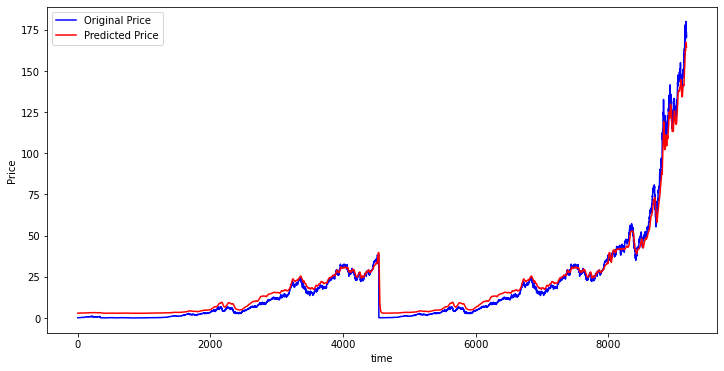

In [41]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('time')
plt.ylabel('Price')
plt.legend()
plt.show()